### Optical character recognition(OCR):

- OCR is used to extract text from any printed document

- any image

- any scanned document

- OCR can implemented by many methods, in that one of method is tessract

### Implementation of tessract

1. Install tesseract using windows installer available at: 
    
        https://github.com/UB-Mannheim/tesseract/wiki
                      
2. While install notedown the path: It mostly :
        
        C:\Program Files\Tesseract-OCR


3. pip install pytesseract


4. Set the tesseract path in the script before calling image_to_string:

         pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [1]:
import cv2
import pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

### Case-1

In [ ]:
# Pillow 
from PIL import Image
img_location = 'C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Data science\\Batch-1_May3\\NLP\\Python codes\\images\\invoice-sample.jpg'
image = Image.open(img_location)
image

In [ ]:
# CV2
img = cv2.imread('C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Data science\\Batch-1_May3\\NLP\\Python codes\\images\\invoice-sample.jpg')
cv2.imshow('img', img)
cv2.waitKey(0)

In [ ]:
img.shape

# 1150 : height
# 835: width
# 3: RGB

In [ ]:
#print(pytesseract.image_to_boxes(image) )
#print(pytesseract.image_to_data(image) )
#print(pytesseract.image_to_string(image) )

In [ ]:
print(pytesseract.image_to_boxes(image) )

In [ ]:
print(pytesseract.image_to_data(image))

In [ ]:
# save into text file
info='file.txt'
with open(info,'w') as file:
    file.write(pytesseract.image_to_data(image))


In [ ]:
print(pytesseract.image_to_string(image))

In [ ]:
# save into text file
info='ocr_invoive_output.txt'
with open(info,'w') as file:
    file.write(pytesseract.image_to_string(image))

In [ ]:
boxes = pytesseract.image_to_boxes(img)
boxes.splitlines()

In [ ]:
h, w, c = img.shape
h,w,c
# height=1150
#w=835

59 
1150-951 
67 
1150-960

img=cv2.imread(img_location,
               cv2.COLOR_BGR2GRAY)

start_window=(59,67)
end_window= (199,190)
color=(0,0,255)
thikness=5
rec_image=cv2.rectangle(img,
              start_window,
              end_window,
              color,
              thikness)

cv2.imshow("image",rec_image)

cv2.waitKey(0)         
cv2.destroyAllWindows()

# This is the problem 
# we need to provide correct values of start window and end window

In [ ]:
img = cv2.imread('C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Data science\\Batch-1_May3\\NLP\\Python codes\\images\\invoice-sample.jpg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    #I 128 983 163 1063 
    img = cv2.rectangle(img, 
                        (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), 
                        (0, 255, 0), 
                        1)

cv2.imshow('img', img)
cv2.waitKey(0)

In [ ]:
#b[1]=128
#b[2]=1150-983
#b[3]=163
#b[4]=1150-1063

#128,167,163,87
#128	83	358	86

#### Case-2

In [ ]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Data science\\Batch-1_May3\\NLP\\Python codes\\images\\invoice-sample.jpg')


d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

In [ ]:
d['text']

In [ ]:
n_boxes = len(d['text'])
n_boxes

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) >30:
        # x=128    y=83    w=358    h=86
        # (128,83) (486,169)
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

### Case-3:

In [4]:
img="C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Data science\\Batch-1_May3\\NLP\\Python codes\\images\\test-image-for-recognition.jpg"

In [5]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
# read the image using OpenCV
#image = cv2.imread(img)
# or you can use Pillow
image = Image.open(img)

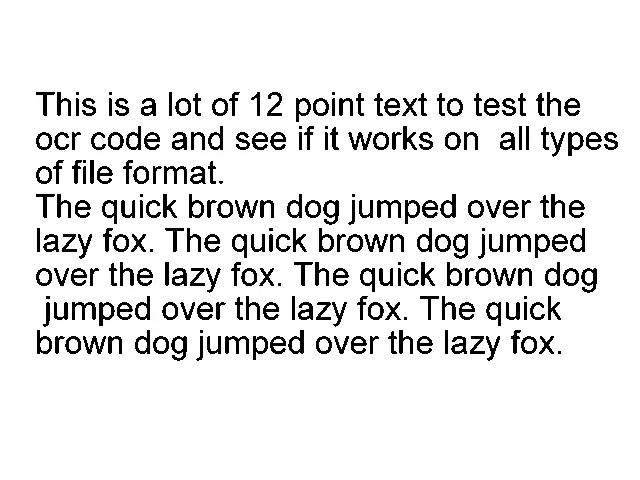

In [7]:
image

In [8]:
# get the string
string = pytesseract.image_to_string(image)
# print it
print(string)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



In [ ]:
# Traffic signal jump identifiactions
# you want automate
# suppose a person jumps the traffic signal
# traffic camaers capture the image
# it will send the challan 


# Capturing the number plate image
# OCR === Numbers 
# Vehicle data base
# python seracch that vehcicle number matches ----- user information
# using a generative AI : caption, not wear the helmet/ 3memvers riding
# based on that generated text , you are search how  much fine
# that fine is given to the user



# Step-1: 
# Create a database name: vehicle
# create a table name: user_vehicle_information
# columns: name of the owner, mobile number, vehicle type, vehicle number

# step-2:
# If you want to create more table
# Rule_volation
# Voilation   challan_cost

# step-3: Take the your vehicle number plate images



In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('digits.png')
img
#gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [ ]:
img